In [78]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [82]:
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [86]:
category_features = list(df.select_dtypes(include="object").columns)

In [88]:
for col in category_features:
    df[col] = df[col].astype("category")

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

## EDA

### Duplicate

In [94]:
df.nunique() # уникальные значения

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [96]:
df.duplicated().sum() # дубликатов не выявлено

0

### Пропуски

In [99]:
df.isnull().sum().sum() # пропусков не выявлено

0

### Типы данных

In [102]:
categorial_features  = list(df.select_dtypes(include=['object']).columns)

print(categorial_features)

[]


In [104]:
df[categorial_features]

""
0
1
2
3
4
...
27896
27897
27898
27899


In [106]:
for i in categorial_features:
    print(f"Unique for {i}: {df[i].unique()}\n")

In [108]:
outlier_arr = [i for i in df["City"].unique() if (df['City'] == i).sum() < 5]

for i in df["City"].unique():
    print(f"{i} - {(df['City'] == i).sum()}")

Visakhapatnam - 969
Bangalore - 767
Srinagar - 1372
Varanasi - 685
Jaipur - 1036
Pune - 968
Thane - 1139
Chennai - 885
Nagpur - 651
Nashik - 547
Vadodara - 694
Kalyan - 1570
Rajkot - 816
Ahmedabad - 951
Kolkata - 1066
Mumbai - 699
Lucknow - 1155
Indore - 643
Surat - 1078
Ludhiana - 1111
Bhopal - 934
Meerut - 825
Agra - 1094
Ghaziabad - 745
Hyderabad - 1340
Vasai-Virar - 1290
Kanpur - 609
Patna - 1007
Faridabad - 461
Delhi - 768
Saanvi - 2
M.Tech - 1
Bhavna - 2
'Less Delhi' - 1
City - 2
3.0 - 1
'Less than 5 Kalyan' - 1
Mira - 1
Harsha - 2
Vaanya - 1
Gaurav - 1
Harsh - 1
Reyansh - 1
Kibara - 1
Rashi - 1
ME - 1
M.Com - 1
Nalyan - 1
Mihir - 1
Nalini - 1
Nandini - 1
Khaziabad - 1


In [110]:
outlier_arr

['Saanvi',
 'M.Tech',
 'Bhavna',
 "'Less Delhi'",
 'City',
 '3.0',
 "'Less than 5 Kalyan'",
 'Mira',
 'Harsha',
 'Vaanya',
 'Gaurav',
 'Harsh',
 'Reyansh',
 'Kibara',
 'Rashi',
 'ME',
 'M.Com',
 'Nalyan',
 'Mihir',
 'Nalini',
 'Nandini',
 'Khaziabad']

In [112]:
for i in df["Degree"].unique():
    print(f"{i} - {(df['Degree'] == i).sum()}")

B.Pharm - 810
BSc - 888
BA - 600
BCA - 1433
M.Tech - 1022
PhD - 522
'Class 12' - 6080
B.Ed - 1867
LLB - 671
BE - 613
M.Ed - 821
MSc - 1190
BHM - 925
M.Pharm - 582
MCA - 1044
MA - 544
B.Com - 1506
MD - 572
MBA - 562
MBBS - 696
M.Com - 734
B.Arch - 1478
LLM - 482
B.Tech - 1152
BBA - 696
ME - 185
MHM - 191
Others - 35


In [114]:
df = df[~df["City"].isin(outlier_arr)]

In [116]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [118]:
print((df['Financial Stress'] == '?').sum())

3


In [120]:
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

df = df.dropna(subset=['Financial Stress'])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27872 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27872 non-null  int64   
 1   Gender                                 27872 non-null  category
 2   Age                                    27872 non-null  float64 
 3   City                                   27872 non-null  category
 4   Profession                             27872 non-null  category
 5   Academic Pressure                      27872 non-null  float64 
 6   Work Pressure                          27872 non-null  float64 
 7   CGPA                                   27872 non-null  float64 
 8   Study Satisfaction                     27872 non-null  float64 
 9   Job Satisfaction                       27872 non-null  float64 
 10  Sleep Duration                         27872 non-null  category

In [124]:
categorial_features  = list(df.select_dtypes(include=['category']).columns)
numeric_features = list(df.select_dtypes(include=['float', 'int']).columns)

In [126]:
binary_cols = [i for i in categorial_features if df[i].nunique() == 2]
caterigal_cols = [i for i in categorial_features if df[i].nunique() > 2]

In [128]:
le = LabelEncoder()
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [130]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[caterigal_cols])

In [132]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,City_Hyderabad,City_Indore,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27869,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
df = df.drop(caterigal_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [136]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27867,140685,0,27.0,5.0,0.0,5.75,5.0,0.0,1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,140686,1,27.0,2.0,0.0,9.40,3.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27869,140689,1,31.0,3.0,0.0,6.61,4.0,0.0,0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27870,140690,0,18.0,5.0,0.0,6.88,2.0,0.0,1,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
df.isnull().sum().sum()

0

In [140]:
df.isnull().values.any() #проверка на NaN

False

In [142]:
scaler = StandardScaler()
df[numeric_features[1:-1]] = scaler.fit_transform(df[numeric_features[1:-1]])

In [144]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,1.463117,1.345121,-0.009782,0.893375,-0.693958,-0.015348,1,-1.121211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,-0.371359,-0.826352,-0.009782,-1.193784,1.510343,-0.015348,0,-1.121211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,1.055455,-0.102528,-0.009782,-0.425546,1.510343,-0.015348,0,0.497114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,0.443963,-0.102528,-0.009782,-1.404540,-0.693958,-0.015348,1,-0.851491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,-0.167528,0.621297,-0.009782,0.322296,0.040809,-0.015348,1,-1.660653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27867,140685,0,0.240133,1.345121,-0.009782,-1.295763,1.510343,-0.015348,1,-0.042328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,140686,1,0.240133,-0.826352,-0.009782,1.185714,0.040809,-0.015348,0,-1.930374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27869,140689,1,1.055455,-0.102528,-0.009782,-0.711086,0.775576,-0.015348,0,1.306277,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27870,140690,0,-1.594343,1.345121,-0.009782,-0.527525,-0.693958,-0.015348,1,0.766835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KMeans

In [146]:
df_not_processed_km = df.copy()

In [34]:
inertias = []
silhouettes = []

In [52]:
K = range(2, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df, kmeans.labels_))

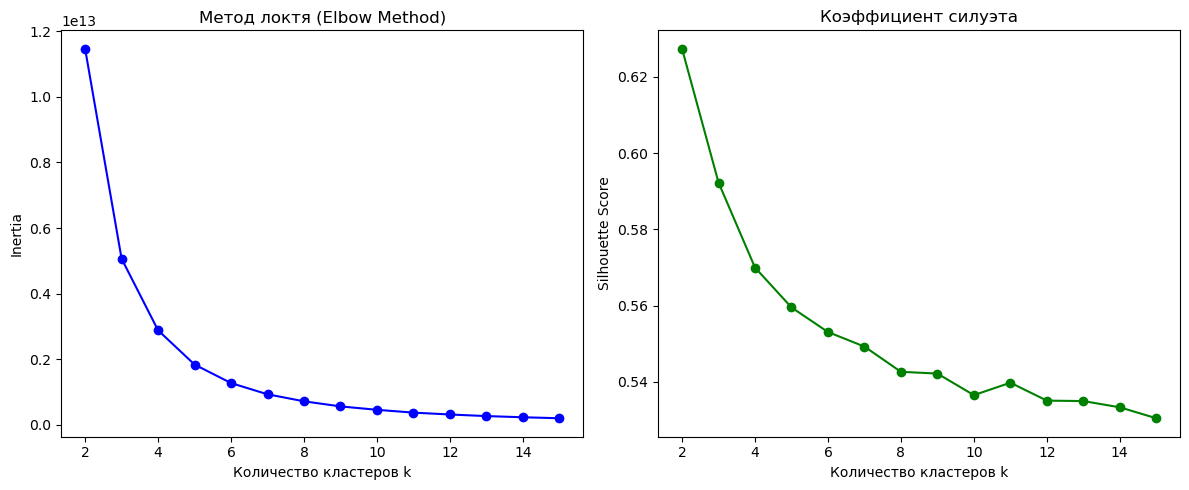

In [154]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()

По методу локтя и коэфициенту силуэта, можем определить, что оптимпльное количестов кластеров для нашего датасета равняется - 4.

Основная идея метода — итеративное повторение двух шагов:
1. распределение объектов выборки по кластерам;
2. пересчёт центров кластеров.

In [168]:
kmeans_best = KMeans(n_clusters=4, random_state=42)
kmeans_best.fit(df)

KMeans(n_clusters=4, random_state=42)

In [170]:
df_not_processed_km['cluster'] = kmeans_best.labels_

In [172]:
cluster_means_km = df_not_processed_km.groupby('cluster').mean()
cluster_means_km

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
cluster,,,,,,,,,,,,,,,,,,,,,
0,52726.763978,0.560280,0.006090,-0.015370,-0.009782,-0.008128,0.000476,-0.015348,0.622161,-0.004312,...,0.019656,0.019802,0.024024,0.037566,0.021549,0.006261,0.007426,0.041788,0.001747,0.019656
1,122795.119340,0.556214,0.014479,0.008154,0.006243,-0.018547,0.005361,0.013236,0.632529,-0.004090,...,0.018479,0.019608,0.026097,0.039075,0.019185,0.006348,0.006630,0.042460,0.000987,0.018903
2,17622.405807,0.562294,-0.005858,0.001216,0.006468,0.020089,-0.011847,0.007195,0.634244,0.008329,...,0.021027,0.020312,0.024174,0.036905,0.019883,0.006866,0.006723,0.042197,0.001430,0.017737
3,87725.467649,0.550260,-0.014950,0.005669,-0.003219,0.006768,0.006002,-0.005593,0.642548,0.000055,...,0.018920,0.020797,0.025274,0.036251,0.021375,0.007077,0.006644,0.044050,0.000867,0.018631


In [174]:
cluster_means_km = df_not_processed_km.groupby('cluster').mean()
cluster_means_km[["Age", "Gender", "Depression"]]

,Age,Gender,Depression
cluster,,,
0,0.006090,0.560280,0.580082
1,0.014479,0.556214,0.587671
2,-0.005858,0.562294,0.587613
3,-0.014950,0.550260,0.586655


In [178]:
inr_km = kmeans_best.inertia_
sil_km = silhouette_score(df, kmeans_best.labels_)
db_index_km = davies_bouldin_score(df, kmeans_best.labels_)
ch_index_km = calinski_harabasz_score(df, kmeans_best.labels_)

print(f"Kmeans inertia - {round(inr_km / 1e13, 3)}\nSilhoutte score - {round(sil_km, 3)}\nDBI - {round(db_index_km, 3)}\nCHI - {round(ch_index_km, 3)}")

Kmeans inertia - 0.288
Silhoutte score - 0.57
DBI - 0.503
CHI - 139007.091


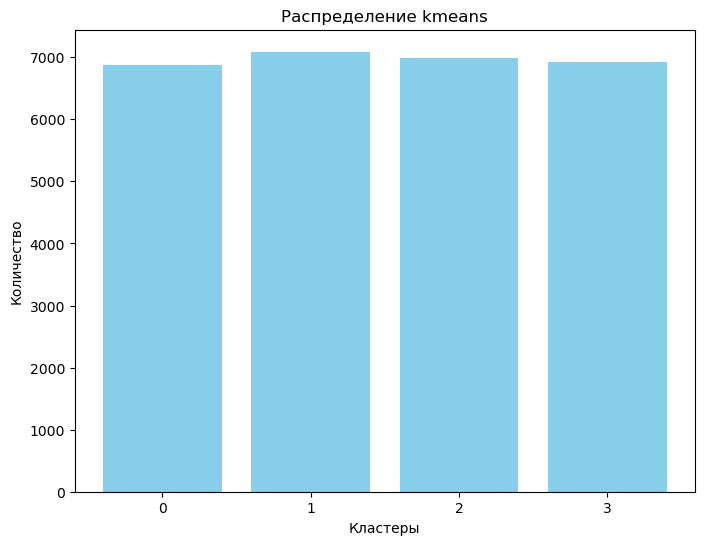

In [296]:
cluster_counts = df_not_processed_km['cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index.astype(str), cluster_counts.values, color='skyblue')
plt.xlabel('Кластеры')
plt.ylabel('Количество')
plt.title('Распределение kmeans')
plt.show()

## DBSCAN

In [183]:
df_not_processed_dbs = df.copy()

In [185]:
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

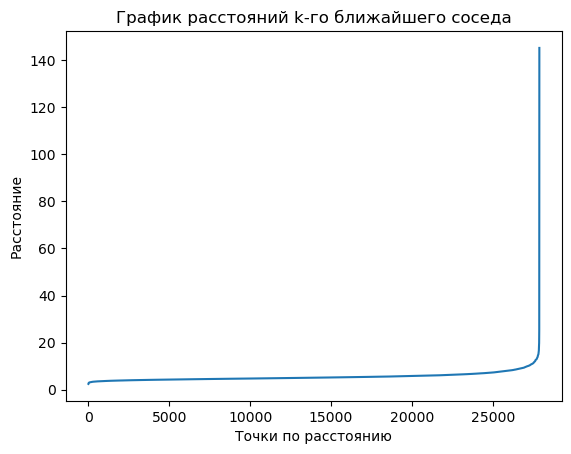

In [186]:
distances = np.sort(distances[:, 1]) 
plt.plot(distances)
plt.title('График расстояний k-го ближайшего соседа')
plt.ylabel('Расстояние')
plt.xlabel('Точки по расстоянию')
plt.show()

In [187]:
dbscan = DBSCAN(eps=17, min_samples=10)
clusters_dbs = dbscan.fit_predict(df)

In [188]:
df_not_processed_dbs['cluster'] = clusters_dbs

In [189]:
mask = clusters_dbs != -1

In [190]:
sil_dbs = silhouette_score(df_not_processed_dbs[mask], clusters_dbs[mask])
db_index_dbs = davies_bouldin_score(df_not_processed_dbs[mask], clusters_dbs[mask])
ch_index_dbs = calinski_harabasz_score(df_not_processed_dbs[mask], clusters_dbs[mask])

print(f"Silhoutte score - {round(sil_dbs, 3)}\nDBI - {round(db_index_dbs, 3)}\nCHI - {round(ch_index_dbs, 3)}")

Silhoutte score - 0.773
DBI - 0.28
CHI - 94105652.984


In [191]:
cluster_mean_dbs = df_not_processed_dbs.groupby('cluster').mean()
cluster_mean_dbs

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
cluster,,,,,,,,,,,,,,,,,,,,,
-1,70710.822407,0.563510,-0.000732,0.003648,0.006177,-0.007268,0.005240,0.009691,0.631000,-0.008131,...,0.018907,0.021365,0.023941,0.036525,0.019902,0.006849,0.007258,0.043901,0.001288,0.020721
0,331.571429,0.500000,-0.487834,0.362788,-0.009782,0.057152,-0.536508,-0.015348,0.714286,0.131064,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000
1,529.466667,0.666667,0.158601,-0.006018,-0.009782,0.189497,-0.449036,-0.015348,0.533333,0.263356,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000
2,601.769231,0.615385,0.067661,0.064508,-0.009782,-0.013972,-0.241794,-0.015348,0.846154,0.476366,...,0.000000,0.076923,0.000000,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000
3,720.813953,0.627907,0.026822,-0.018362,-0.009782,-0.124986,0.023721,-0.015348,0.627907,0.189758,...,0.023256,0.000000,0.000000,0.023256,0.069767,0.000000,0.000000,0.023256,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,139807.800000,0.500000,-0.432508,0.331767,-0.009782,0.244112,0.555146,-0.015348,0.400000,0.038589,...,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
757,139988.153846,0.461538,0.240133,-0.102528,-0.009782,-0.520726,0.323411,-0.015348,0.692308,0.580105,...,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923
758,140162.545455,0.272727,-0.352829,-0.102528,-0.009782,-0.528761,-0.025988,-0.015348,0.818182,-0.140408,...,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


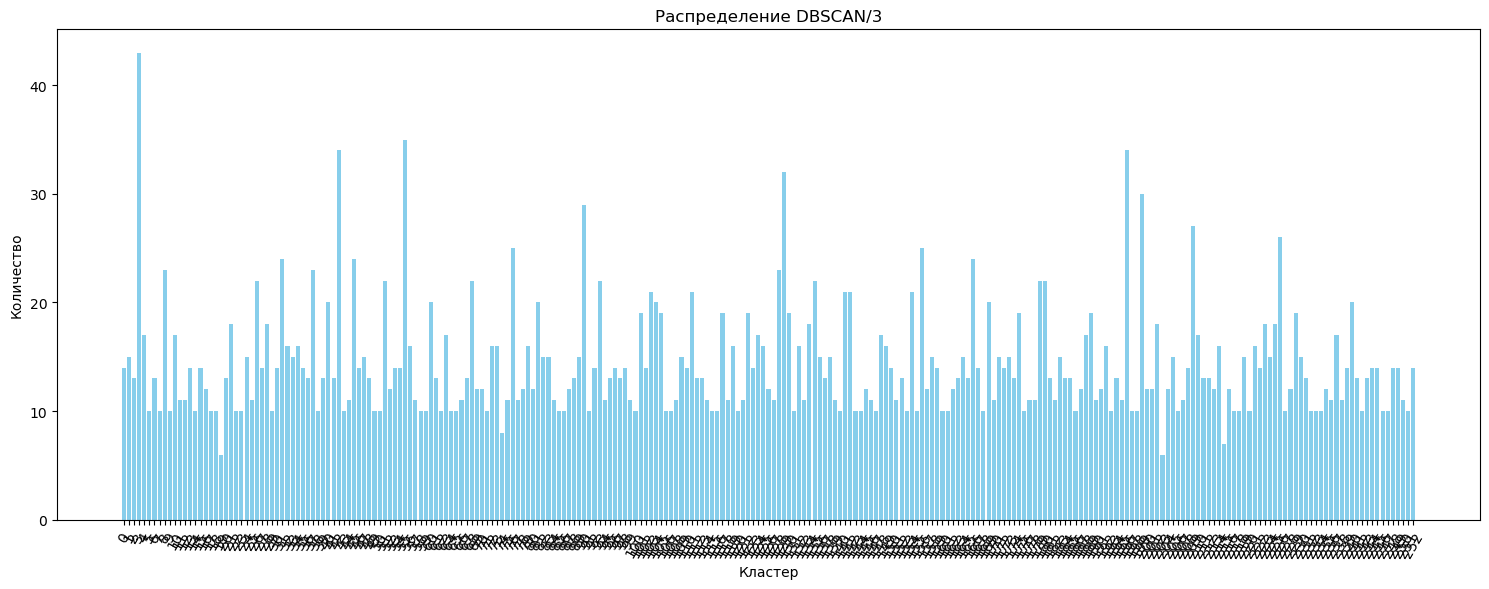

In [294]:
cluster_counts = df_not_processed_dbs[df_not_processed_dbs['cluster'] != -1]['cluster'].value_counts().sort_index()

num_clusters = len(cluster_counts)
one_third = num_clusters // 3
subset_counts = cluster_counts.iloc[:one_third]

plt.figure(figsize=(15,6))
plt.bar(subset_counts.index.astype(str), subset_counts.values, color='skyblue')
plt.xlabel('Кластер')
plt.ylabel('Количество')
plt.title('Распределение DBSCAN/3')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [215]:
cluster_mean_dbs[cluster_mean_dbs["Depression"] > 0.8][["Age", "Depression"]]

,Age,Depression
cluster,,
2,0.067661,0.846154
12,-0.111938,0.818182
16,0.104246,0.833333
69,-0.558204,0.833333
107,0.199367,0.900000
127,-0.389889,0.818182
133,-0.667840,0.818182
176,0.097451,0.900000
185,0.004944,0.923077


МЫ можем провести анализ по высокому значению Depression.

In [259]:
df_not_processed_dbs[df_not_processed_dbs['cluster'] == -1]["cluster"].value_counts()

cluster
-1    17084
Name: count, dtype: int64

In [243]:
transposed = cluster_mean_dbs[["Age", "Gender", "Depression"]][:1].transpose()
transposed

cluster,-1
Age,-0.000732
Gender,0.563510
Depression,0.586397


In [291]:
df["Depression"].mean(), df["Gender"].mean()

(0.5855338691159586, 0.5572617680826636)

По кластеру `-1` можем выделить. 

Он получился довольно большим. Мы можем судить, что значительная часть группы - аномальные наблюдений в данных. Которые можно подробнее исследовать. 

Можно и дальше изучать данные кластера `-1` для выявления аномалий

### **Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета**

Наш набор данных описывает студентов с депрессией и без, по различным признакам. Оптимальным методом будет являться DBSCAN. Мы можем искать не просто сферические группы студентов, а группы произвольной формы, которые помогут нам определить разные уровни риска по группам. Также ключевым показателем в DBSCAN могут послужить выбросы, которые помогут определить студентов с высоким риском депрессии. Тот факт, что в K-means нам необходимо указывать количество кластеров, также склоняет нас в пользу DBSCAN, так как мы можем искать не просто группы, а определенные паттерны депрессии.

Ну и еще DBSCAN победил по метрикам :)